# Linear regression and on iris dataset using python. 
  This assignment helped me to understand the how linear regression work.

# 1.The Iris Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

# 1.1 Preparing the Data

 importing necessary libraries

In [39]:
#importing necessary libraries
import pandas as pd
import statistics
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

load the data

In [40]:
#load the data
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [41]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Normalizing the data 

In [42]:
#Normalizing the data 
data_X=iris_dataset.data
no_of_coloums=data_X.shape[0]
for i1 in range (no_of_coloums):
    data_X[i1]=(data_X[i1]-data_X[i1].mean())/data_X[i1].std()

split the data into traning and testing samples

In [43]:
# split the data into traning and testing samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_X,iris_dataset.target,test_size=0.1)


In [44]:
def create_model(i,j):
        x1 = x_train[:, i]
        y1 = x_train[:, j]
        return x1,y1
def create_model_test(i,j):
        x1_test = x_test[:, i]
        y1_test = x_test[:, j]
        return x1_test,y1_test
def plot_lossFunction(a,b):
        plt.xlabel("ephochs")
        plt.ylabel("loss")
        #plt.ylim(-10,10)
        plt.plot(a,b,color ="red")
        plt.show()

 

# Defining the linear regression  model
Here I defined my own fit and predict functions

In [45]:
class LinearRegression:
    def fit(self):
        M=[]
        B=[]
        for i in range(4):
            for j in range(4):
                if (j>1 and i!=j):
                    print("Model to predict", features[j], "with ", features[i], ":")
                    x1,y1 = create_model(i,j) #creating the model 
                    x2 = x1.reshape(x1.shape[0], 1)
                    n0_of_samples=x1.shape[0]
                    batch_size=32
                    n = 100
                    learning_rate = 0.0075
                    b=0 #intializing intercept =0
                    m=1 #intailiazing the coeffiecient to 1(slope)
                    a3=[]
                    loss_func=[]
                    for a in range(n):
                         for a1 in range((n0_of_samples//batch_size)):
                            x_1=np.random.choice(n0_of_samples, batch_size)
                            y_hat=b+m*x1[x_1]
                            loss_function= (0.5 * np.sum((y1[x_1]-y_hat)**2))/batch_size
                            b=b-(learning_rate*loss_function) #updating the value of b
                            m= m-(learning_rate*loss_function) 
                            a3.append(a)
                            loss_func.append(loss_function)
                            
                    print(features[j]," = ", m," * ",features[i]," + (",b,")" )
                    plot_lossFunction(a3,loss_func) 
                    B.append(b)
                    M.append(m)
                   
                    print("loss is equal to ",loss_function)
        return(B,M)
def predict(x_test,Intercept,coefficient,model_num):
        return Intercept[model_num]*x_test +coefficient[model_num]

In [46]:
linearREg=LinearRegression()


Model to predict petal length (cm) with  sepal length (cm) :
petal length (cm)  =  0.20643983702083124  *  sepal length (cm)  + ( -0.7935601629791692 )


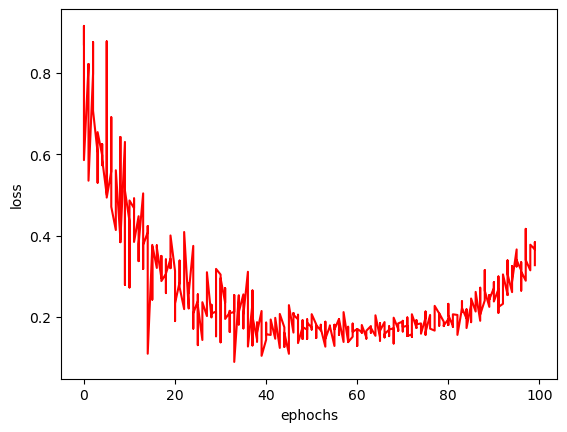

loss is equal to  0.3272893850500006
Model to predict petal width (cm) with  sepal length (cm) :
petal width (cm)  =  -0.004459915877766171  *  sepal length (cm)  + ( -1.0044599158777672 )


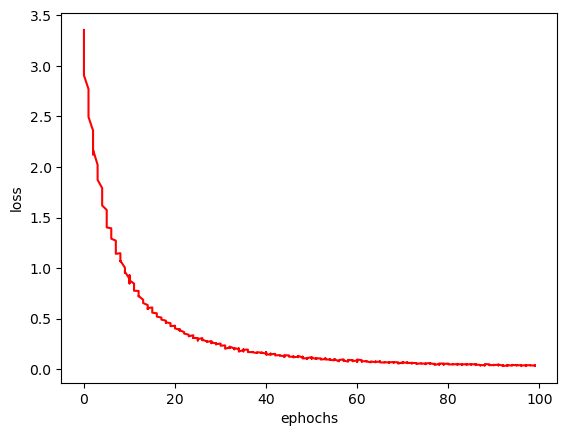

loss is equal to  0.03403615264935094
Model to predict petal length (cm) with  sepal width (cm) :
petal length (cm)  =  -2.8915454182788185  *  sepal width (cm)  + ( -3.89154541827882 )


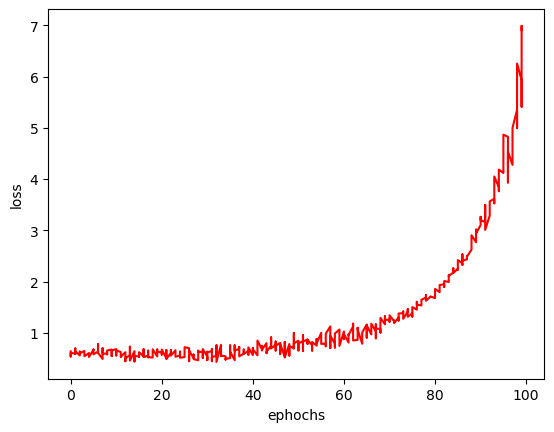

loss is equal to  6.906830951669464
Model to predict petal width (cm) with  sepal width (cm) :
petal width (cm)  =  0.21442103972393511  *  sepal width (cm)  + ( -0.7855789602760643 )


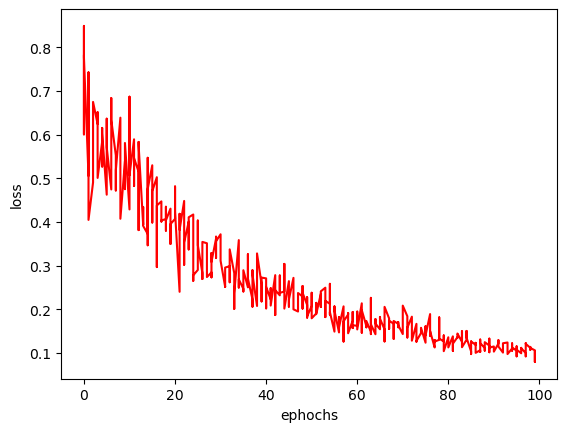

loss is equal to  0.10246653859440547
Model to predict petal width (cm) with  petal length (cm) :
petal width (cm)  =  0.11150499058600372  *  petal length (cm)  + ( -0.8884950094139957 )


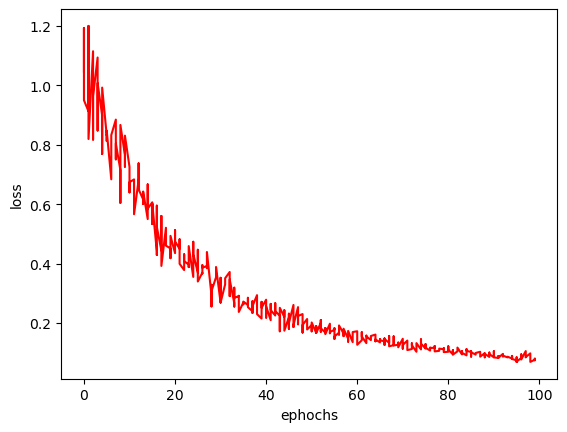

loss is equal to  0.07909251496658141
Model to predict petal length (cm) with  petal width (cm) :
petal length (cm)  =  -1.2190241787248077  *  petal width (cm)  + ( -2.2190241787248057 )


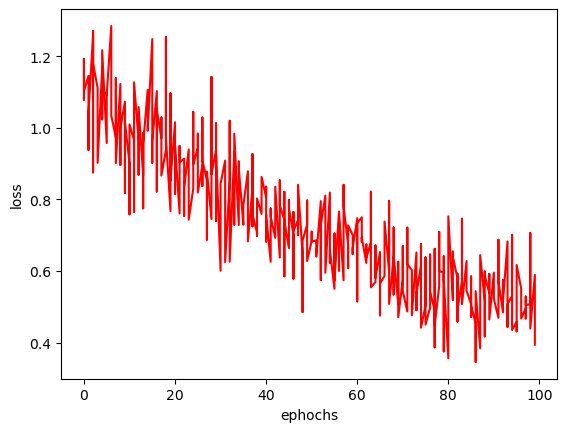

loss is equal to  0.3944559792044092
predicting petal length (cm)  given sepal length (cm)  = -0.7323796988468485  when  sepal length (cm) =  1.1830477129083452
predicting petal width (cm)  given sepal length (cm)  = -1.1927839220650673  when  sepal length (cm) =  1.1830477129083452
predicting petal length (cm)  given sepal width (cm)  = -0.37475554924252563  when  sepal width (cm) =  -0.6467327497232286
predicting petal width (cm)  given sepal width (cm)  = 0.7224806808279891  when  sepal width (cm) =  -0.6467327497232286
predicting petal width (cm)  given petal length (cm)  = -0.5472043890730921  when  petal length (cm) =  0.7413765667558961
predicting petal length (cm)  given petal width (cm)  = 1.6162042191661887  when  petal width (cm) =  -1.2776915299410128


In [47]:
B,M=linearREg.fit()
k=0
for i in range(4):
    for j in range(4):
        if (j>1 and i!=j):
            x1,y1 = create_model_test(i,j)
            y= predict(x1[1],B,M,k)
            print("predicting",features[j]," given", features[i]," =", y,' when ',features[i],"= ",x1[1])
            k=k+1



In [48]:
def mean_squared_error():
    k=0
    for i in range(4):
            for j in range(4):
                if (j>1 and i!=j):
                    print("mean squared error when predicting", features[j], "with ", features[i], ":")
                    x1,y1 = create_model_test(i,j) #creating the model 
                    x2 = x1.shape[0]
                    target=predict(x1,B,M,k)
                    target_transpose = target.reshape(target.shape[0], 1)
                    mse= (np.matmul(target,target_transpose))/x2
                    print(features[j]," = ", M[k],"*",features[i],"+", B[k],"mean squared error= ", mse[0])
                    
        
mean_squared_error()

mean squared error when predicting petal length (cm) with  sepal length (cm) :
petal length (cm)  =  0.20643983702083124 * sepal length (cm) + -0.7935601629791692 mean squared error=  0.6748809870850361
mean squared error when predicting petal width (cm) with  sepal length (cm) :
petal width (cm)  =  0.20643983702083124 * sepal length (cm) + -0.7935601629791692 mean squared error=  0.6748809870850361
mean squared error when predicting petal length (cm) with  sepal width (cm) :
petal length (cm)  =  0.20643983702083124 * sepal width (cm) + -0.7935601629791692 mean squared error=  0.4041168974100227
mean squared error when predicting petal width (cm) with  sepal width (cm) :
petal width (cm)  =  0.20643983702083124 * sepal width (cm) + -0.7935601629791692 mean squared error=  0.4041168974100227
mean squared error when predicting petal width (cm) with  petal length (cm) :
petal width (cm)  =  0.20643983702083124 * petal length (cm) + -0.7935601629791692 mean squared error=  0.169472980460

# Linear Regression with Regularization
Here i defined my own fit and predict functions for Linear Regression with Regularization

In [49]:
class LinearRegression_L2_reg:
    def fit(self):
        M=[]
        B=[]
        for i in range(4):
            for j in range(4):
                if (j>1 and i!=j):
                    print("Model to predict", features[j], "with ", features[i], ":")
                    x1,y1 = create_model(i,j) #creating the model 
                    x2 = x1.reshape(x1.shape[0], 1)
                    n0_of_samples=x1.shape[0]
                    batch_size=32
                    n = 100
                    learning_rate = 0.0075
                    b=0 #intializing intercept =0
                    m=1 #intailiazing the coeffiecient to 1(slope)
                    a3=[]
                    lamda= 0.1
                    loss_func=[]
                    for a in range(n):
                         for a1 in range((n0_of_samples//batch_size)):
                            x_1=np.random.choice(n0_of_samples, batch_size)
                            y_hat=b+m*x1[x_1]
                            weights= (y_hat**2)
                            loss_function= ((0.5 * np.sum((y1[x_1]-y_hat)**2))+(lamda*np.sum(weights)))/batch_size
                            b=b-(learning_rate*loss_function) #updating the value of b
                            m= m-(learning_rate*loss_function) 
                            a3.append(a)
                            loss_func.append(loss_function)
                    print(features[j]," = ", m," * ",features[i]," + (",b,")" )
                    plot_lossFunction(a3,loss_func) 
                    B.append(b)
                    M.append(m)
                    print("loss is equal to ",loss_function) 
        return(B,M)
def predict_reg(x_test,Intercept,coefficient,model_num):
        return Intercept[model_num]*x_test +coefficient[model_num]

In [50]:
linearREg_l2_reg=LinearRegression_L2_reg()

Model to predict petal length (cm) with  sepal length (cm) :
petal length (cm)  =  0.11516443493772663  *  sepal length (cm)  + ( -0.8848355650622722 )


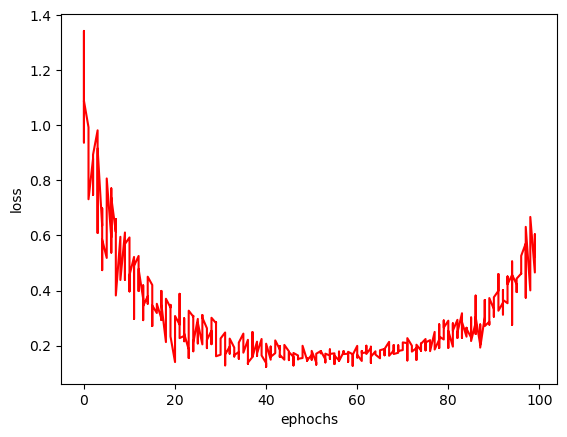

loss is equal to  0.5239543663879631
Model to predict petal width (cm) with  sepal length (cm) :
petal width (cm)  =  -0.1670902187048103  *  sepal length (cm)  + ( -1.1670902187048104 )


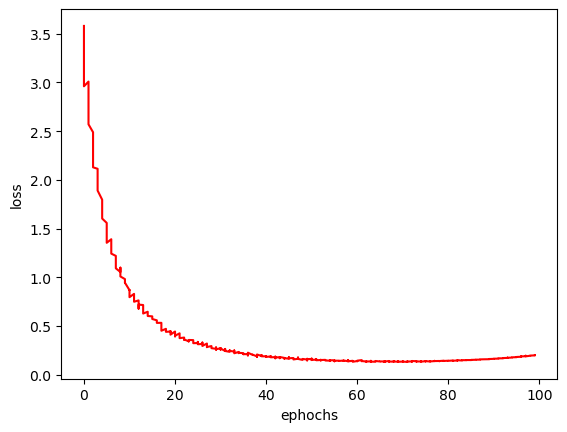

loss is equal to  0.2013344544470232
Model to predict petal length (cm) with  sepal width (cm) :
petal length (cm)  =  -11.048205692882169  *  sepal width (cm)  + ( -12.04820569288217 )


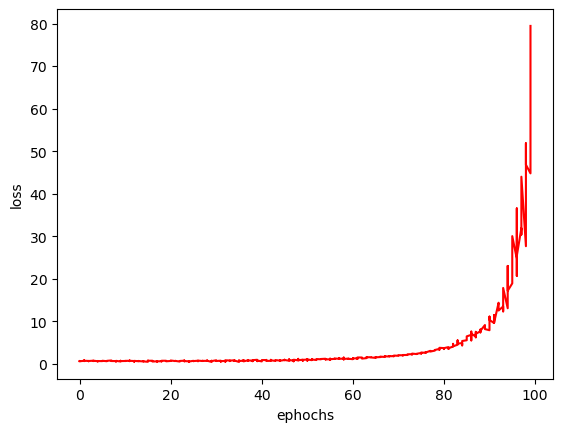

loss is equal to  79.44465217154837
Model to predict petal width (cm) with  sepal width (cm) :
petal width (cm)  =  0.11205357867912688  *  sepal width (cm)  + ( -0.8879464213208734 )


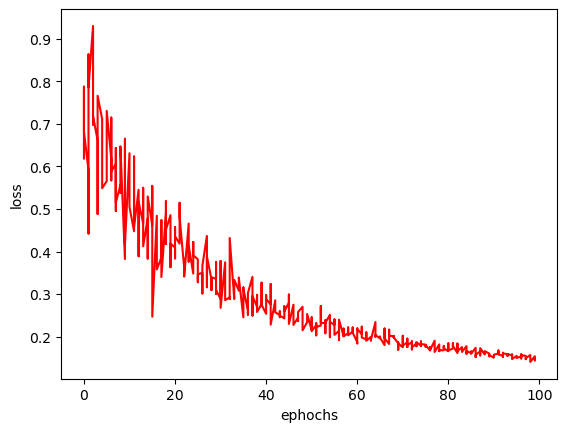

loss is equal to  0.1459689238172972
Model to predict petal width (cm) with  petal length (cm) :
petal width (cm)  =  0.014390573693060843  *  petal length (cm)  + ( -0.9856094263069377 )


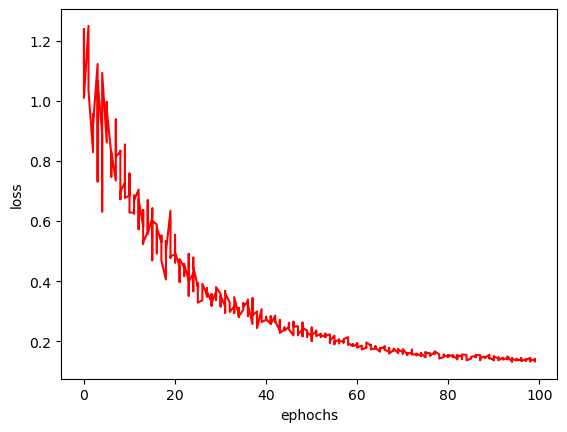

loss is equal to  0.13359218635595496
Model to predict petal length (cm) with  petal width (cm) :
petal length (cm)  =  -1.3926382989137431  *  petal width (cm)  + ( -2.3926382989137442 )


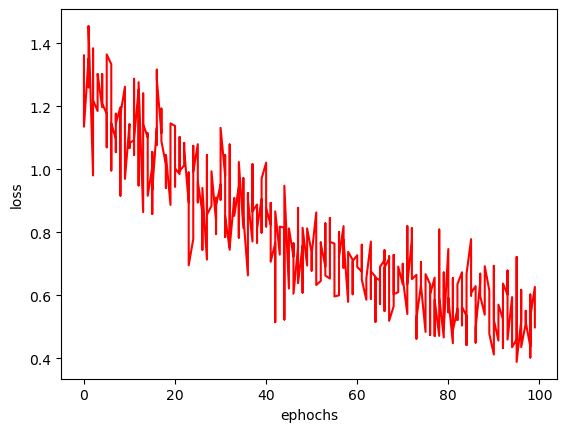

loss is equal to  0.4986686327531725


In [51]:
B_reg,M_reg=linearREg_l2_reg.fit()

In [52]:
def mean_squared_error_L2_Reg():
    k=0
    for i in range(4):
            for j in range(4):
                if (j>1 and i!=j):
                    print("mean squared error when predicting with regularization", features[j], "with ", features[i], ":")
                    x1,y1 = create_model_test(i,j) #creating the model 
                    x2 = x1.shape[0]
                    target=predict_reg(x1,B_reg,M_reg,k)
                    target_transpose = target.reshape(target.shape[0], 1)
                    mse= (np.matmul(target,target_transpose))/x2
                    print(features[j]," = ", M_reg[k],"*",features[i],"+", B_reg[k],"mean squared error= ", mse[0])
                    
        
mean_squared_error_L2_Reg()


mean squared error when predicting with regularization petal length (cm) with  sepal length (cm) :
petal length (cm)  =  0.11516443493772663 * sepal length (cm) + -0.8848355650622722 mean squared error=  1.0619080048357274
mean squared error when predicting with regularization petal width (cm) with  sepal length (cm) :
petal width (cm)  =  0.11516443493772663 * sepal length (cm) + -0.8848355650622722 mean squared error=  1.0619080048357274
mean squared error when predicting with regularization petal length (cm) with  sepal width (cm) :
petal length (cm)  =  0.11516443493772663 * sepal width (cm) + -0.8848355650622722 mean squared error=  0.37750322495925454
mean squared error when predicting with regularization petal width (cm) with  sepal width (cm) :
petal width (cm)  =  0.11516443493772663 * sepal width (cm) + -0.8848355650622722 mean squared error=  0.37750322495925454
mean squared error when predicting with regularization petal width (cm) with  petal length (cm) :
petal width (cm)